## 相關係數
- df.corr()

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_df = pd.read_csv('./data/original_cereal.csv', encoding="UTF-8")

columns = list(data_df.describe().columns)


### 以 df.corr() 建立相關矩陣

In [26]:
df_corr = data_df[columns].corr()

### 以 np.tril_indices_from() 建立三角形遮罩

In [27]:
mask = np.zeros_like(df_corr)
mask[np.tril_indices_from(mask)] = 1

### 顯示無數值相關矩陣

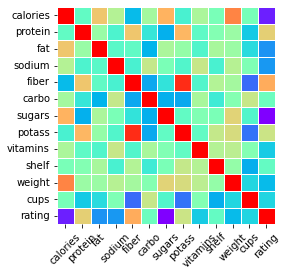

In [28]:
sns.heatmap(df_corr, cbar=False, square=True,
            cmap='rainbow',
            linewidths=1,
            )
plt.xticks(rotation=45)
plt.show()

### 顯示以 np.tril_indices_from() 遮罩處理以及數值的相關矩陣

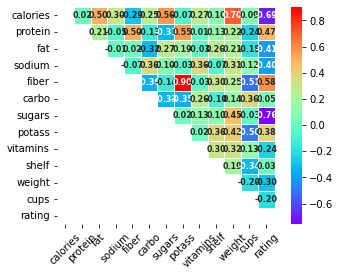

In [29]:
sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 8, 'weight': 'bold'},
            yticklabels=columns, xticklabels=columns, cmap='rainbow',
            linewidths=1,
            mask=mask)
plt.xticks(rotation=45)
plt.show()

### 各欄位與欄位 `rating` 之相關係數

In [30]:
print(df_corr['rating'].sort_values(ascending=False))

rating      1.000000
fiber       0.584160
protein     0.470618
potass      0.380165
carbo       0.052055
shelf       0.025159
cups       -0.203160
vitamins   -0.240544
weight     -0.298124
sodium     -0.401295
fat        -0.409284
calories   -0.689376
sugars     -0.759675
Name: rating, dtype: float64


### 以 np.corrcoef(() 建立相關矩陣

In [31]:
cm = np.corrcoef(data_df[columns].values.T)

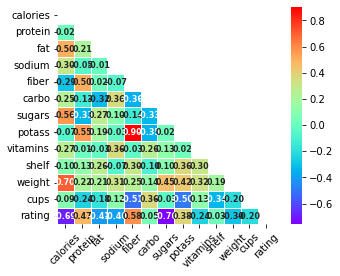

In [32]:
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size': 8, 'weight': 'bold'},
            yticklabels=columns, xticklabels=columns, cmap='rainbow',
            linewidths=1,
            mask=mask.T)
plt.xticks(rotation=45)
plt.show()

In [33]:
print('各欄位與[rating]欄位相關性')
print(pd.concat((pd.DataFrame(columns[:], columns=['特徵名稱']),
                 pd.DataFrame(cm[:][len(columns) - 1], columns=['相關係數'])), axis=1)
      .sort_values(by='相關係數', ascending=False)[:])

各欄位與[rating]欄位相關性
        特徵名稱      相關係數
12    rating  1.000000
4      fiber  0.584160
1    protein  0.470618
7     potass  0.380165
5      carbo  0.052055
9      shelf  0.025159
11      cups -0.203160
8   vitamins -0.240544
10    weight -0.298124
3     sodium -0.401295
2        fat -0.409284
0   calories -0.689376
6     sugars -0.759675
